In [8]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

##Perspective Transformation ##

In [2]:
image = cv2.imread("./giraffe.jpg")

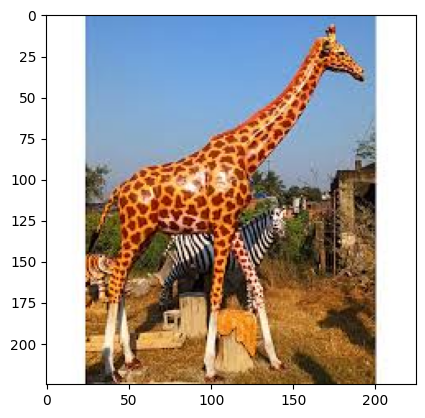

In [4]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [6]:
image_rgb.shape

(225, 225, 3)

In [9]:
rows , cols , _ = image_rgb.shape

In [12]:
input_point = np.float32([[50,50], [cols -50,50], [50,rows - 50], [cols-50,rows -50]])


output_point = np.float32([[10,100], [cols -100,50], [100,rows - 10], [cols-50,rows -100]])

"""
transformation matrix for perspective transformation
3x3
a,b,c
d ,e,f
g,h,l

a,b,c - responsible horizontal scaling ,rotationa and translation
d,e,f - responsible for vertical scaling,rotatoon and translation
gh - perspective components that account for depth and skew
"""

M = cv2.getPerspectiveTransform(input_point,output_point)
##m matrix used for warp perspective transofrmation
print(M)

[[ 2.24629499e+00  1.14184898e+00 -1.55116443e+02]
 [-1.99011997e-01  1.55751588e+00  7.49823571e+01]
 [ 7.45236415e-03  1.12914608e-03  1.00000000e+00]]


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

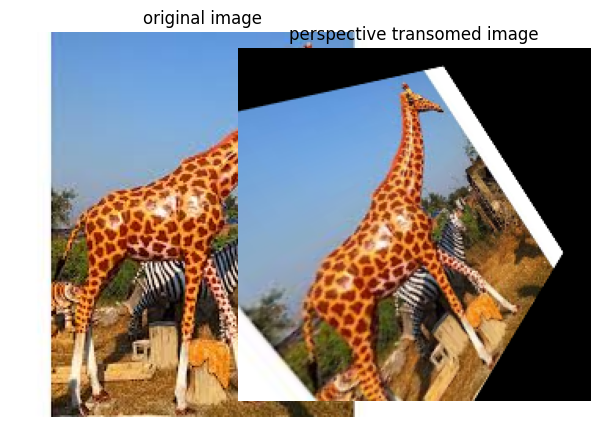

In [15]:
perspective_image = cv2.warpPerspective(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.imshow(image_rgb)
plt.title("original image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("perspective transomed image")
plt.axis("off")

##affine transformation
we need three points

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

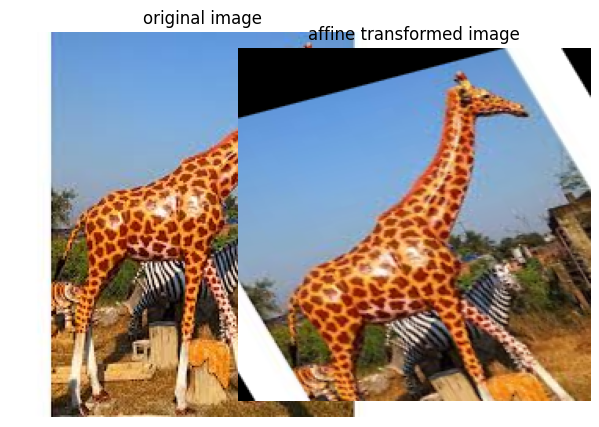

In [18]:
input_points=np.float32([[50,50],[200,50],[50,200]])
output_points = np.float32([[10,100],[200,50],[100,250]])

"""
transformation matrix for perspective transformation
3x3
a,b,c
d ,e,f
g,h,l

a,b,c - responsible horizontal scaling ,rotationa and translation
d,e,f - responsible for vertical scaling,rotatoon and translation
gh - perspective components that account for depth and skew
"""

M = cv2.getAffineTransform(input_points,output_points)
##m matrix used for warp perspective transofrmation
print(M)


perspective_image = cv2.warpAffine(image_rgb,M,(cols,rows))
plt.figure(figsize=(10,5))
plt.imshow(image_rgb)
plt.title("original image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("affine transformed image")
plt.axis("off")

Rotation

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

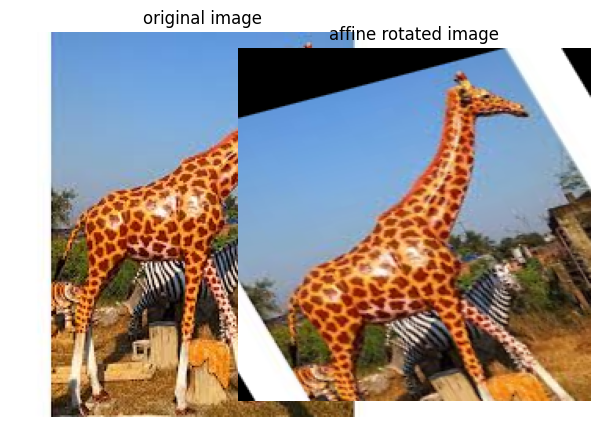

In [21]:
angle = 80
center = (cols //2 , rows //2 )
scale = 1.0

M = cv2.getRotationMatrix2D(center,angle,scale)

rotated_image = cv2.warpAffine(image_rgb,M,(cols,rows))


plt.figure(figsize=(10,5))
plt.imshow(image_rgb)
plt.title("original image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("affine rotated image")
plt.axis("off")


shearing

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

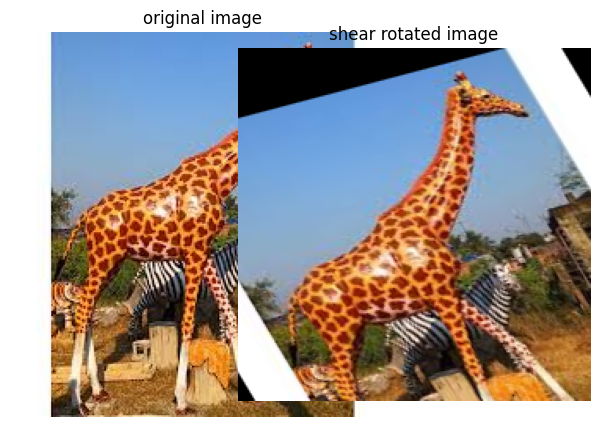

In [ ]:
angle = 80
center = (cols //2 , rows //2 )
scale = 1.0

shear_x ,shear_y = 0.5,0

M = np.float32([[3,shear_x,0] ,
            [shear_y,1,0]])

M = cv2.getRotationMatrix2D(center,angle,scale)

rotated_image = cv2.warpAffine(image_rgb,M,(cols + int(shear_y),rows+int(shear_x)))
#

plt.figure(figsize=(10,5))
plt.imshow(image_rgb)
plt.title("original image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("shear rotated image")
plt.axis("off")


Translation

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

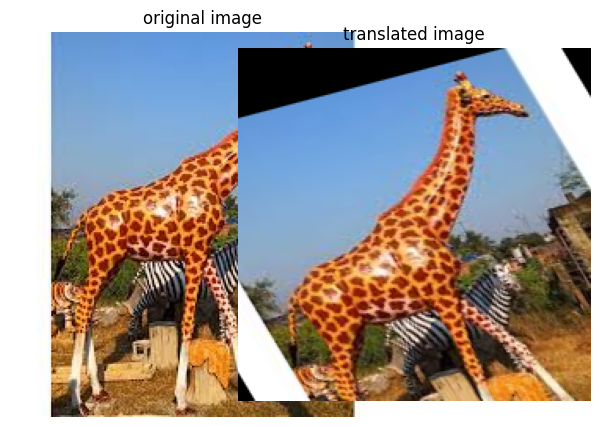

In [26]:
tx ,ty = 200,300

M = np.float32([[1,0,tx] ,
            [0,1,ty]])

translated_image = cv2.warpAffine(image_rgb,M,(cols,rows))


plt.figure(figsize=(10,5))
plt.imshow(image_rgb)
plt.title("original image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("translated image")
plt.axis("off")
